[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ashwin-r-k/forFun/blob/main/Free_Time_slot_finder.ipynb)

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta


In [10]:


def plot_busy_slots(people_busy_slots, start_time, end_time):
    fig, ax = plt.subplots()

    start_datetime = datetime.strptime(start_time, '%H:%M')
    end_datetime = datetime.strptime(end_time, '%H:%M')
    ax.set_xlim(start_datetime, end_datetime)

    for idx, person_busy_slots in enumerate(people_busy_slots):
        for busy_start, busy_end in person_busy_slots:
            busy_start = datetime.strptime(busy_start, '%H:%M')
            busy_end = datetime.strptime(busy_end, '%H:%M')

            ax.fill_betweenx(y=[idx-0.4, idx+0.4], x1=busy_start, x2=busy_end, color='red', alpha=0.7)

    ax.set_yticks(range(len(people_busy_slots)))
    ax.set_yticklabels([f'Person {i+1}' for i in range(len(people_busy_slots))])
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xlabel('Time')
    plt.title('Busy Time Slots')

    plt.show()


In [11]:

def find_free_slots(people_busy_slots, start_time, end_time, slot_duration):
    busy_slots = []

    start_datetime = datetime.strptime(start_time, '%H:%M')
    end_datetime = datetime.strptime(end_time, '%H:%M')

    slot_duration = timedelta(minutes=slot_duration)

    for person_busy_slots in people_busy_slots:
        busy_slots.extend(person_busy_slots)

    busy_slots.sort(key=lambda x: x[0])

    free_slots = [(start_datetime, end_datetime)]

    for busy_start, busy_end in busy_slots:
        busy_start = datetime.strptime(busy_start, '%H:%M')
        busy_end = datetime.strptime(busy_end, '%H:%M')

        new_free_slots = []

        for free_start, free_end in free_slots:
            if busy_start < free_end and busy_end > free_start:
                if busy_start > free_start:
                    new_free_slots.append((free_start, busy_start))
                if busy_end < free_end:
                    new_free_slots.append((busy_end, free_end))
            else:
                new_free_slots.append((free_start, free_end))

        free_slots = new_free_slots

    filtered_free_slots = [(start, end) for start, end in free_slots if (end - start).total_seconds() >= slot_duration.total_seconds()]

    return [(str(slot[0].time()), str(slot[1].time())) for slot in filtered_free_slots]


In [12]:


def plot_busy_and_free_slots(people_busy_slots, free_slots, start_time, end_time):
    fig, ax = plt.subplots()

    start_datetime = datetime.strptime(start_time, '%H:%M')
    end_datetime = datetime.strptime(end_time, '%H:%M')
    ax.set_xlim(start_datetime, end_datetime)

    for idx, (person_busy_slots, label) in enumerate(zip(people_busy_slots, person_labels)):
        for busy_start, busy_end in person_busy_slots:
            busy_start = datetime.strptime(busy_start, '%H:%M')
            busy_end = datetime.strptime(busy_end, '%H:%M')

            ax.fill_betweenx(y=[idx-0.4, idx+0.4], x1=busy_start, x2=busy_end, color='red', alpha=0.7)

        ax.text(end_datetime, idx, f'{label}', va='center', ha='left', color='black', fontweight='bold')

    for free_start, free_end in free_slots:
        free_start = datetime.strptime(free_start, '%H:%M:%S')
        free_end = datetime.strptime(free_end, '%H:%M:%S')

        ax.fill_betweenx(y=[0, len(people_busy_slots)], x1=free_start, x2=free_end, color='green', alpha=0.5)


    ax.set_yticks(range(len(people_busy_slots)))
    ax.set_yticklabels([])
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xlabel('Time')
    plt.title('Busy and Free Time Slots')

    plt.show()


# For Project Group One Day.

In [13]:
people_busy_slots = [
    [("09:00", "10:30"), ("12:00", "13:00"), ("14:00", "15:00")],  # Msc 2nd year
    [("10:00", "11:30"), ("13:00", "14:30"), ("15:30", "16:30")],  # Msc 1st year
    [("09:30", "10:30"), ("12:30", "13:30"), ("14:30", "15:30")],  # PHD
    [("09:30", "10:30"), ("12:30", "13:30"), ("14:30", "15:30")],  # SIR
]
person_labels = ["MSC 2", "MSC 1", "PHD","SIR"]

start_time = "08:00"
end_time = "17:00"
slot_duration = 60  # in minutes

free_slots = find_free_slots(people_busy_slots, start_time, end_time, slot_duration)
print("Free Slots:")
for slot in free_slots:
    print(f"{slot[0]} - {slot[1]}")


Free Slots:
08:00:00 - 09:00:00


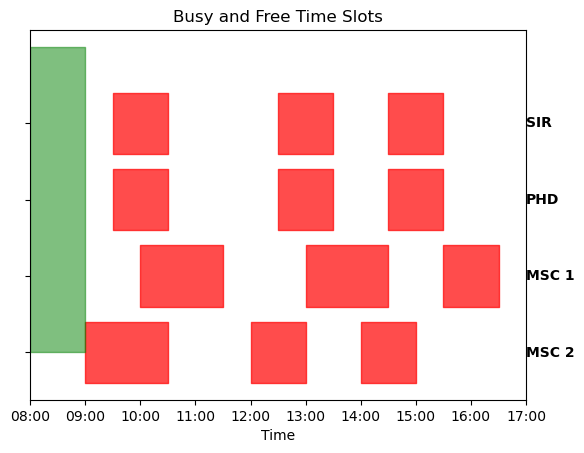

In [14]:
plot_busy_and_free_slots(people_busy_slots, free_slots, start_time, end_time)


# All Days : For Astro Class




Free Slots Monday:
14:00:00 - 18:00:00


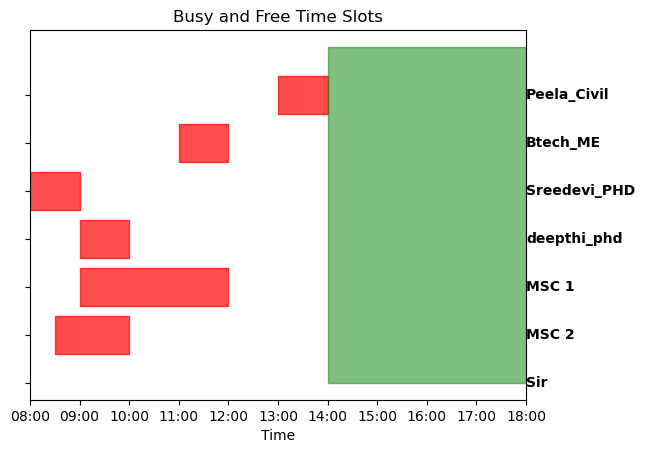

Free Slots Tuesday:


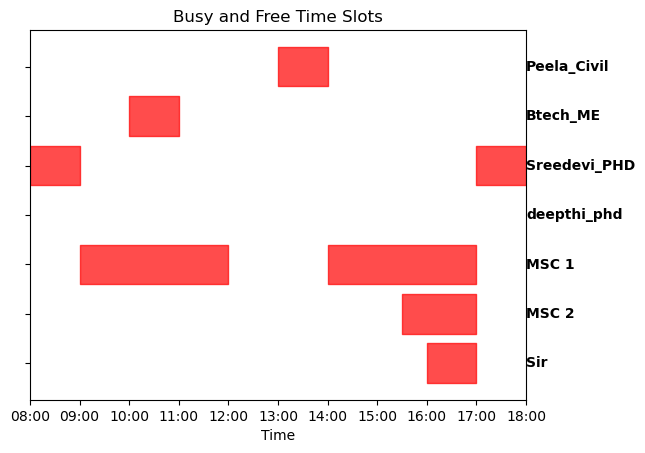

Free Slots Wednesday:


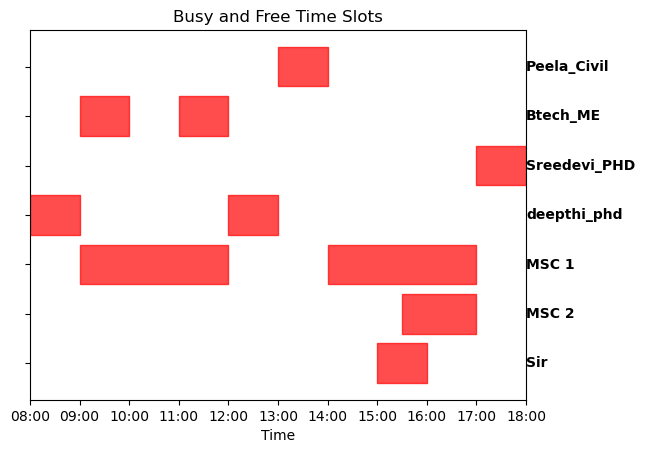

Free Slots Thusday:


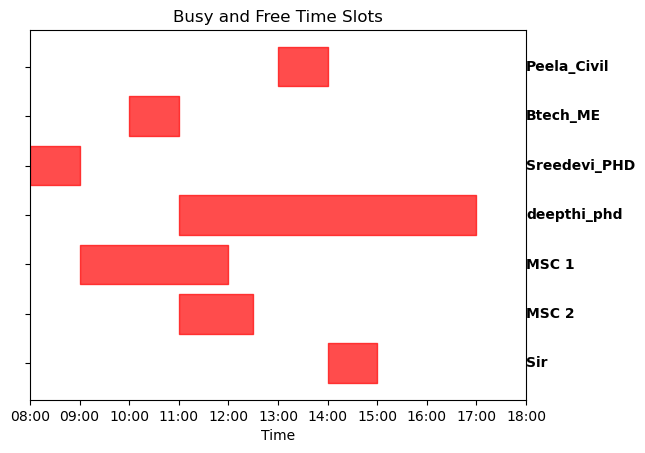

Free Slots Friday:
14:00:00 - 18:00:00


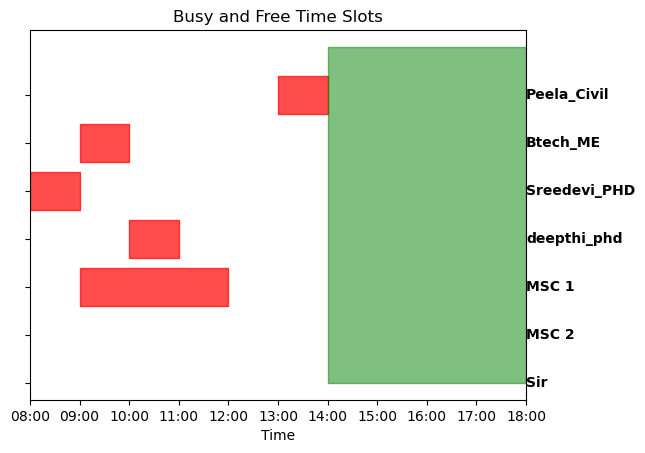

In [16]:
SIR = [
    [],#Monday
    [("16:00", "17:00" )], #Tuesday
    [("15:00", "16:00" )], #Wednesday
    [("14:00", "15:00" )],  #Thusday
    []#Friday
]

MSC2 =[
    [("08:30", "10:00")],#Monday
    [("15:30", "17:00")], #Tuesday
    [("15:30","17:00")], #Wednesday
    [("11:00", "12:30")],  #Thusday
    []#Friday
]

MSC1 =[
    [("09:00", "12:00")],#Monday
    [("09:00", "12:00"),("14:00", "17:00")], #Tuesday
    [("09:00", "12:00"),("14:00", "17:00")], #Wednesday
    [("09:00", "12:00")],  #Thusday
    [("09:00", "12:00")]#Friday
]

deepthi_phd = [
    [("09:00", "10:00")],#Monday
    [],
    [("12:00", "13:00")], #Wednesday
    [("11:00", "17:00")],  #Thursday 
    [("10:00", "11:00")]#Friday
    
]

Sreedevi_PHD =[
    [("09:00", "10:00")],#Monday
    [],
    [("08:00", "09:00"),("12:00", "13:00")], #Wednesday
    [("11:00", "17:00")],  #Thursday 
    [("10:00", "11:00")]#Friday
]

Btech_ME=[
    [("08:00","09:00")],#Monday
    [("08:00","09:00"),("17:00", "18:00")], #Tuesday
    [("17:00","18:00")], #Wednesday
    [("08:00","09:00")],  #Thusday
    [("08:00","09:00")]#Friday
]

Peela_Civil=[
    [("11:00","12:00")],#Monday
    [("10:00","11:00")], #Tuesday
    [("09:00","10:00"),("11:00","12:00")], #Wednesday
    [("10:00","11:00")],  #Thusday
    [("09:00","10:00")]#Friday
]


lunch =[
    [("13:00", "14:00")],#Monday
    [("13:00", "14:00")], #Tuesday
    [("13:00", "14:00")], #Wednesday
    [("13:00", "14:00")],  #Thusday
    [("13:00", "14:00")]#Friday
]

Days = ["Monday" , "Tuesday", "Wednesday", "Thusday", "Friday"]
person_labels = ["Sir", "MSC 2","MSC 1","deepthi_phd","Sreedevi_PHD","Btech_ME","Peela_Civil","lunch"]

start_time = "08:00"
end_time = "18:00"
slot_duration = 90  # in minutes


for i in range(5):
    people_busy_slots = [
        SIR[i],
        MSC2[i],
        MSC1[i],
        Sreedevi_PHD[i],
        Btech_ME[i],
        Peela_Civil[i],
        lunch[i]
    ]

    free_slots = find_free_slots(people_busy_slots, start_time, end_time, slot_duration)
    print(f"Free Slots {Days[i]}:")
    for slot in free_slots:
        print(f"{slot[0]} - {slot[1]}")
    plot_busy_and_free_slots(people_busy_slots, free_slots, start_time, end_time)

